In [27]:
import numpy as np 
import tensorflow as tf 
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [28]:
# load dataset 
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()


In [29]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


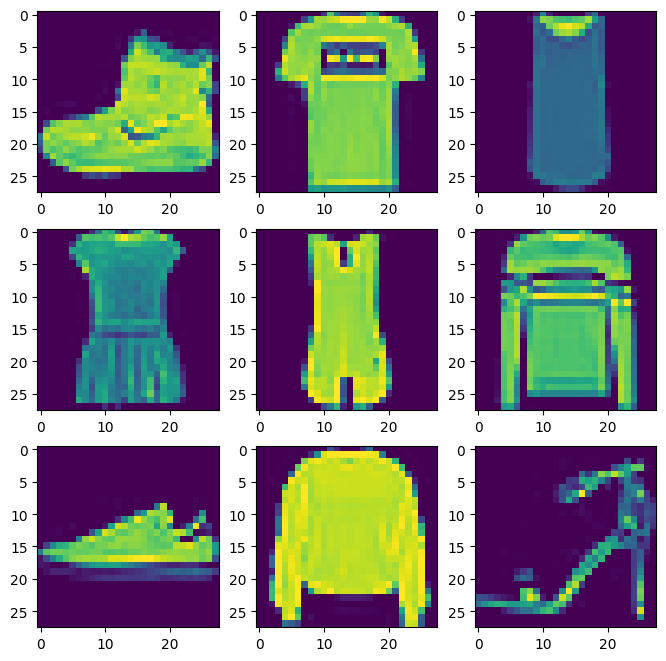

In [30]:
#visualize images
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def plotdata(images,num):
    plt.figure(figsize=(8,8))
    for i in range(num):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
    plt.show()

plotdata(xtrain,9)

# Task 1 : MLP Classification Using SIFT Features

In [31]:
sift=cv2.SIFT_create()
def extract_features(image):
    features=[]
    for i in image:
        keypoint,descriptor=sift.detectAndCompute(i,None)
        if descriptor is not None:
            features.append(np.mean(descriptor,axis=0))
        else:
            features.append(np.zeros(128))
    return np.array(features)



In [32]:
xtrain_sift=extract_features(xtrain)
xtest_sift=extract_features(xtest)


In [33]:
scaler=StandardScaler()
xtrain_sift=scaler.fit_transform(xtrain_sift)
xtest_sift=scaler.transform(xtest_sift)

In [34]:
y_trainc=to_categorical(ytrain,10)
y_testc=to_categorical(ytest,10)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               66048     
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 10)               

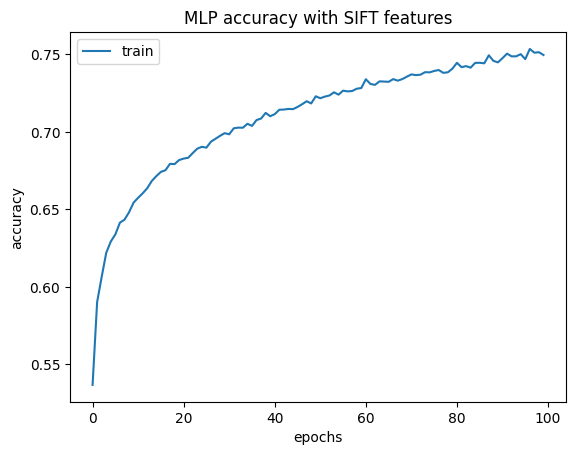

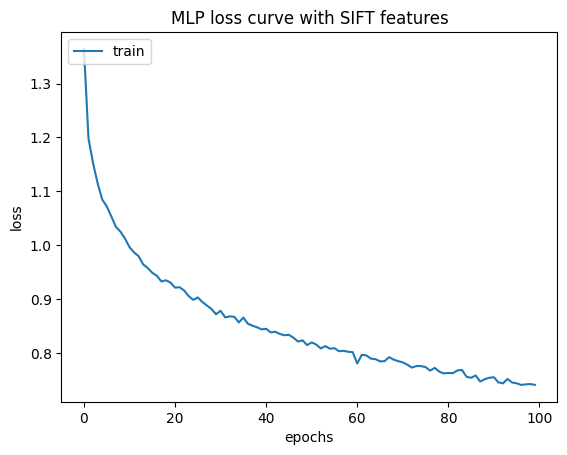

313/313 [==============================] - 0s 802us/step
classification report: 

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1035
           1       0.89      0.66      0.76      1364
           2       0.52      0.62      0.57       850
           3       0.57      0.61      0.59       942
           4       0.64      0.52      0.57      1214
           5       0.82      0.85      0.84       973
           6       0.32      0.47      0.38       690
           7       0.80      0.85      0.82       933
           8       0.74      0.72      0.73      1018
           9       0.87      0.88      0.88       981

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.70      0.68      0.69     10000



<AxesSubplot: >

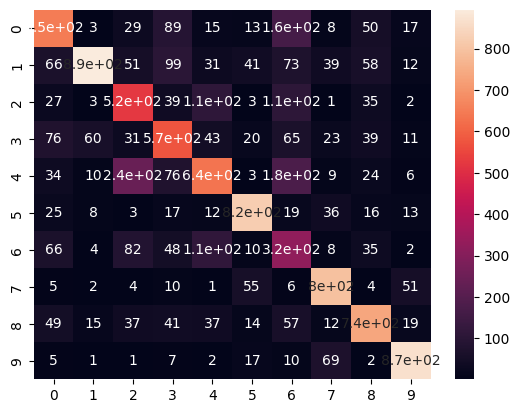

In [35]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.3),
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stop=EarlyStopping(monitor='loss',mode='min',patience=20)
print(model.summary())
history=model.fit(xtrain_sift,y_trainc,epochs=100,batch_size=16,verbose=True,callbacks=[early_stop],validation_split=0.1)
train_loss,train_acc=model.evaluate(xtrain_sift,y_trainc)
print('Training Accuracy: %.4f' % train_acc)
test_loss,test_acc=model.evaluate(xtest_sift,y_testc)
print('Trest accuracy: %.4f'% test_acc)

plt.plot(history.history['accuracy'])
plt.title('MLP accuracy with SIFT features')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('MLP loss curve with SIFT features')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper left")
plt.show()

ypred_prob=model.predict(xtest_sift)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)



# Task 2

In [36]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
    
])

In [37]:
xtrain2=xtrain/255
xtest2=xtest/255

In [38]:
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stop2=EarlyStopping(monitor='loss',mode='min',patience=20)
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)              

In [39]:
history2=model2.fit(xtrain2,y_trainc,epochs=100,batch_size=16,verbose=1,callbacks=[early_stop2],validation_split=0.1)

Epoch 1/100
3375/3375 [==============================] - 21s 6ms/step - loss: 0.6169 - accuracy: 0.7785 - val_loss: 0.4272 - val_accuracy: 0.8418
Epoch 2/100
3375/3375 [==============================] - 20s 6ms/step - loss: 0.4734 - accuracy: 0.8305 - val_loss: 0.3908 - val_accuracy: 0.8582
Epoch 3/100
3375/3375 [==============================] - 20s 6ms/step - loss: 0.4416 - accuracy: 0.8446 - val_loss: 0.3665 - val_accuracy: 0.8668
Epoch 4/100
3375/3375 [==============================] - 20s 6ms/step - loss: 0.4174 - accuracy: 0.8531 - val_loss: 0.3743 - val_accuracy: 0.8668
Epoch 5/100
3375/3375 [==============================] - 20s 6ms/step - loss: 0.4054 - accuracy: 0.8569 - val_loss: 0.3773 - val_accuracy: 0.8708
Epoch 6/100
3375/3375 [==============================] - 20s 6ms/step - loss: 0.3937 - accuracy: 0.8603 - val_loss: 0.3563 - val_accuracy: 0.8693
Epoch 7/100
3375/3375 [==============================] - 20s 6ms/step - loss: 0.3805 - accuracy: 0.8642 - val_loss: 0.3565 -

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2005 - accuracy: 0.9351
Training Accuracy: 0.9351
313/313 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.8888
Trest accuracy: 0.8888


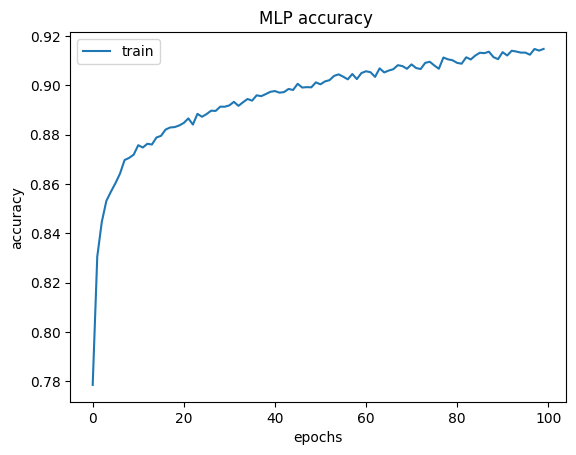

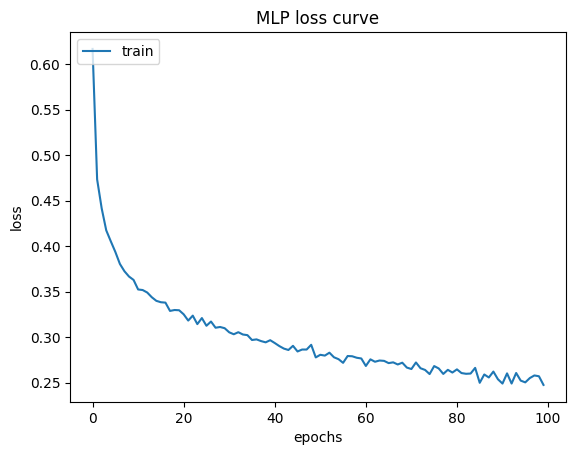

313/313 [==============================] - 0s 1ms/step
classification report: 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       987
           1       0.97      0.99      0.98       979
           2       0.82      0.81      0.81      1009
           3       0.89      0.88      0.89      1006
           4       0.85      0.76      0.80      1128
           5       0.97      0.98      0.97       988
           6       0.65      0.72      0.68       902
           7       0.97      0.95      0.96      1025
           8       0.97      0.99      0.98       984
           9       0.96      0.97      0.97       992

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot: >

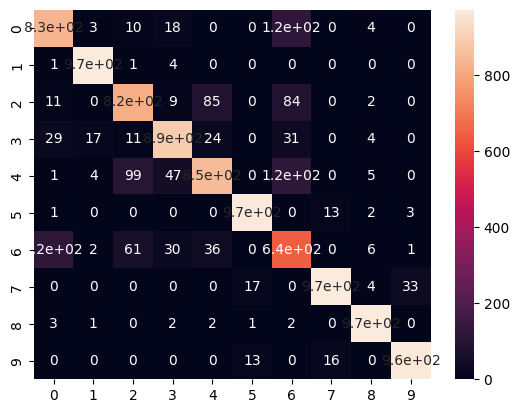

In [40]:
train_loss2,train_acc2=model2.evaluate(xtrain2,y_trainc)
print('Training Accuracy: %.4f' % train_acc2)
test_loss2,test_acc2=model2.evaluate(xtest2,y_testc)
print('Trest accuracy: %.4f'% test_acc2)

plt.plot(history2.history['accuracy'])
plt.title('MLP accuracy ')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.title('MLP loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper left")
plt.show()

ypred_prob=model2.predict(xtest2)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)



# Task 3:  Hyperparameter Tuning 

Task 1 - Combination 1 (Learning rate = 0.01, Batch size = 8, Optimizer = SGD, Activation = ReLU, Loss =
MSE)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               66048     
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 10)              

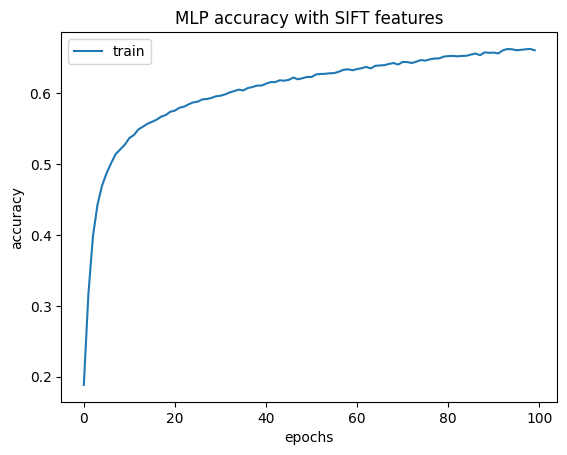

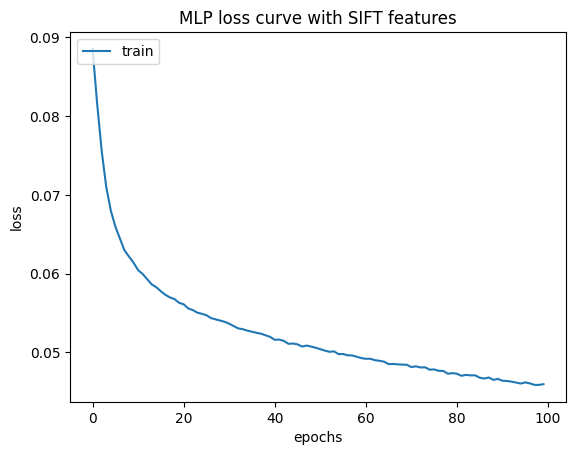

313/313 [==============================] - 0s 766us/step
classification report: 

              precision    recall  f1-score   support

           0       0.59      0.66      0.63       899
           1       0.90      0.64      0.75      1421
           2       0.49      0.60      0.54       813
           3       0.55      0.61      0.58       892
           4       0.60      0.52      0.56      1154
           5       0.83      0.81      0.82      1031
           6       0.32      0.43      0.37       750
           7       0.78      0.79      0.78       985
           8       0.71      0.68      0.70      1051
           9       0.85      0.85      0.85      1004

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.69      0.66      0.67     10000

313/313 [==============================] - 0s 780us/step
classification report: 

              precision    recall  f1-score   support

           0       0.5

<AxesSubplot: >

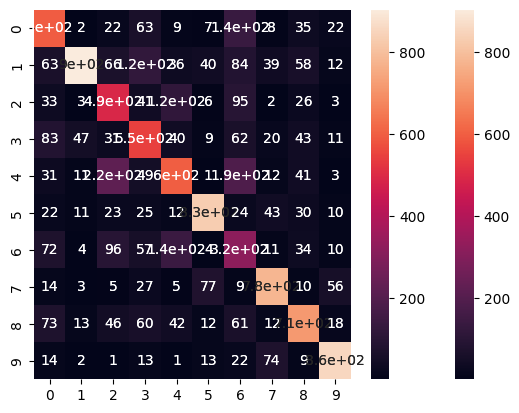

In [45]:
model11=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.3),
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
])
model11.compile(optimizer=SGD(learning_rate=0.01),loss='mse',metrics=['accuracy'])
early_stop=EarlyStopping(monitor='loss',mode='min',patience=20)
print(model11.summary())
history11=model11.fit(xtrain_sift,y_trainc,epochs=100,batch_size=8,verbose=True,callbacks=[early_stop],validation_split=0.1)
train_loss11,train_acc11=model11.evaluate(xtrain_sift,y_trainc)
print('Training Accuracy: %.4f' % train_acc11)
test_loss11,test_acc11=model11.evaluate(xtest_sift,y_testc)
print('Trest accuracy: %.4f'% test_acc11)

plt.plot(history11.history['accuracy'])
plt.title('MLP accuracy with SIFT features')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history11.history['loss'])
plt.title('MLP loss curve with SIFT features')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper left")
plt.show()

ypred_prob=model11.predict(xtest_sift)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)

ypred_prob=model11.predict(xtest_sift)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)



Task 1 - Combination 2 (Learning rate = 0.001, Batch size = 16, Optimizer = Adam, Activation = Tanh, Loss =
Huber)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               66048     
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 10)              

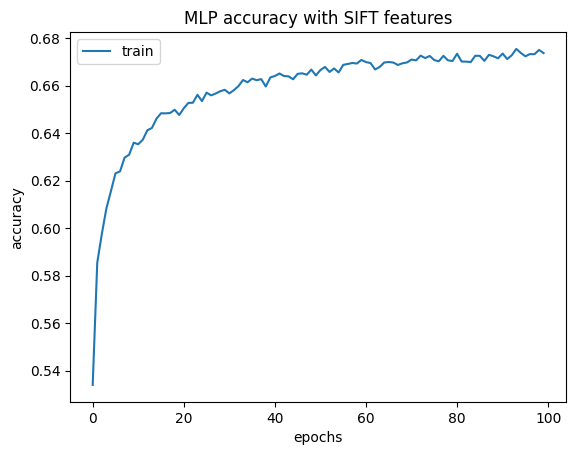

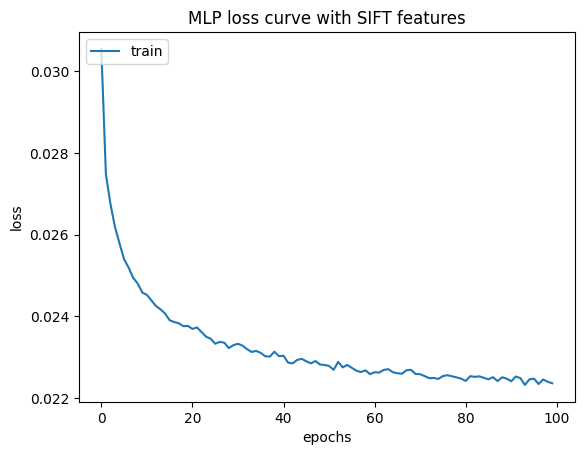

313/313 [==============================] - 0s 1ms/step
classification report: 

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       924
           1       0.90      0.64      0.75      1389
           2       0.49      0.59      0.54       842
           3       0.56      0.61      0.58       924
           4       0.53      0.54      0.54       990
           5       0.82      0.79      0.80      1039
           6       0.36      0.43      0.40       844
           7       0.76      0.79      0.78       963
           8       0.71      0.63      0.67      1123
           9       0.83      0.86      0.84       962

    accuracy                           0.66     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.67      0.66      0.66     10000



<AxesSubplot: >

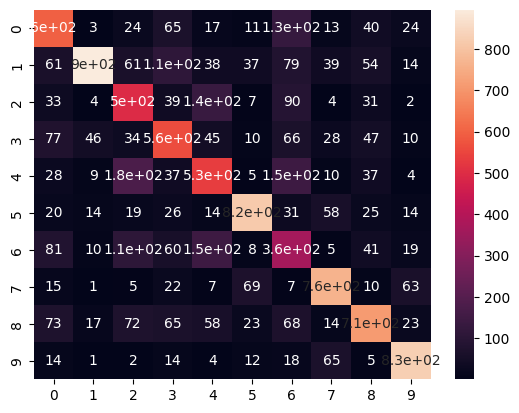

In [46]:
model12=Sequential([
    Dense(512,activation='tanh',input_shape=(128,)),
    Dropout(0.3),
    Dense(256,activation='tanh',input_shape=(128,)),
    Dropout(0.3),
    Dense(128,activation='tanh'),
    Dropout(0.3),
    Dense(10,activation='softmax')
])
model12.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.Huber(),metrics=['accuracy'])
early_stop=EarlyStopping(monitor='loss',mode='min',patience=20)
print(model12.summary())
history12=model12.fit(xtrain_sift,y_trainc,epochs=100,batch_size=16,verbose=True,callbacks=[early_stop],validation_split=0.1)
train_loss12,train_acc12=model12.evaluate(xtrain_sift,y_trainc)
print('Training Accuracy: %.4f' % train_acc12)
test_loss12,test_acc12=model12.evaluate(xtest_sift,y_testc)
print('Trest accuracy: %.4f'% test_acc12)

plt.plot(history12.history['accuracy'])
plt.title('MLP accuracy with SIFT features')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history12.history['loss'])
plt.title('MLP loss curve with SIFT features')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper left")
plt.show()

ypred_prob=model12.predict(xtest_sift)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)




Task 2 - Combination 1 (Learning rate = 0.01, Batch size = 8, Optimizer = SGD, Activation = ReLU, Loss =
MSE)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 512)               401920    
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 256)               131328    
                                                                 
 dropout_37 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                                 
 dropout_38 (Dropout)        (None, 128)             

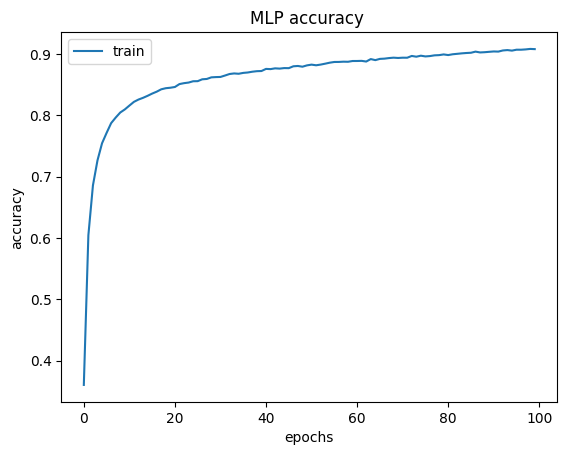

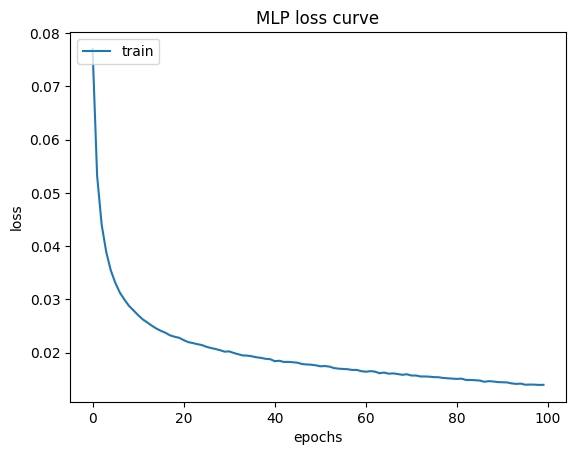

313/313 [==============================] - 1s 1ms/step
classification report: 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1085
           1       0.97      0.99      0.98       974
           2       0.82      0.79      0.81      1047
           3       0.89      0.88      0.89      1006
           4       0.84      0.79      0.81      1056
           5       0.96      0.97      0.97       987
           6       0.60      0.76      0.68       791
           7       0.96      0.93      0.95      1038
           8       0.98      0.94      0.96      1034
           9       0.95      0.97      0.96       982

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.88      0.89     10000



<AxesSubplot: >

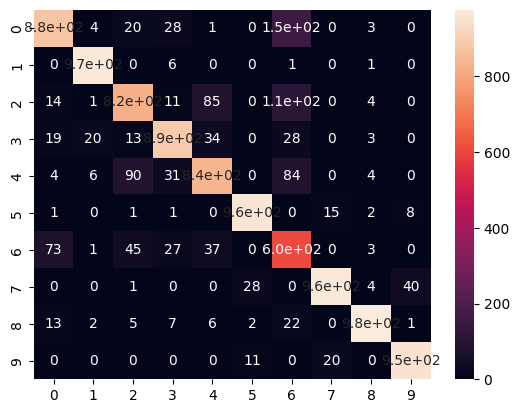

In [47]:
model21=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
    
])

model21.compile(optimizer=SGD(learning_rate=0.01),loss='mse',metrics=['accuracy'])
early_stop2=EarlyStopping(monitor='loss',mode='min',patience=20)
print(model21.summary())

history21=model21.fit(xtrain2,y_trainc,epochs=100,batch_size=8,verbose=1,callbacks=[early_stop2],validation_split=0.1)

train_loss21,train_acc21=model21.evaluate(xtrain2,y_trainc)
print('Training Accuracy: %.4f' % train_acc21)
test_loss21,test_acc21=model21.evaluate(xtest2,y_testc)
print('Trest accuracy: %.4f'% test_acc21)

plt.plot(history21.history['accuracy'])
plt.title('MLP accuracy ')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history21.history['loss'])
plt.title('MLP loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper left")
plt.show()

ypred_prob=model21.predict(xtest2)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)



Task 2 - Combination 2 (Learning rate = 0.001, Batch size = 16, Optimizer = Adam, Activation = Tanh, Loss =
Huber)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 512)               401920    
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dropout_41 (Dropout)        (None, 128)             

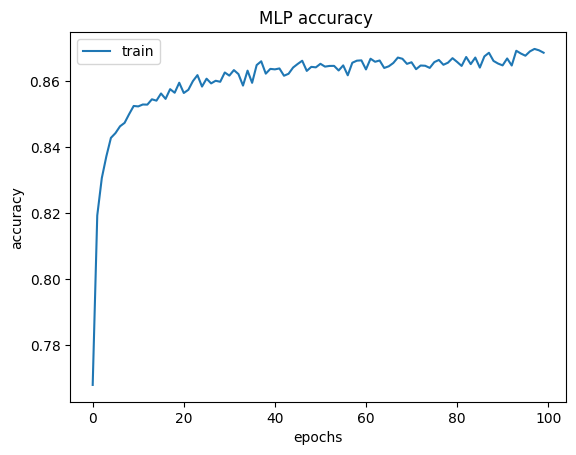

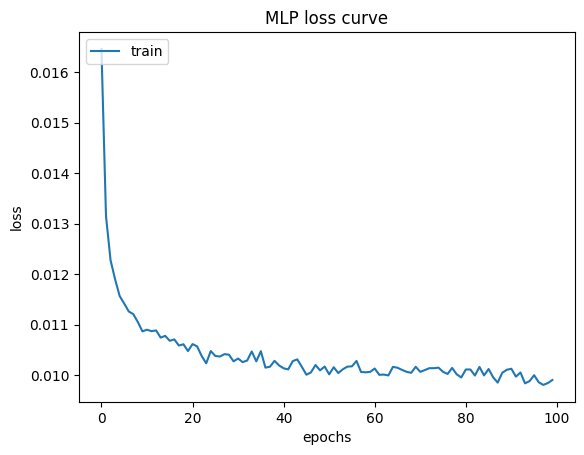

313/313 [==============================] - 1s 1ms/step
classification report: 

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       871
           1       0.95      0.98      0.97       967
           2       0.83      0.72      0.77      1164
           3       0.89      0.86      0.88      1034
           4       0.75      0.79      0.77       949
           5       0.93      0.98      0.95       953
           6       0.67      0.66      0.67      1017
           7       0.96      0.92      0.94      1053
           8       0.96      0.97      0.96       994
           9       0.95      0.95      0.95       998

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



<AxesSubplot: >

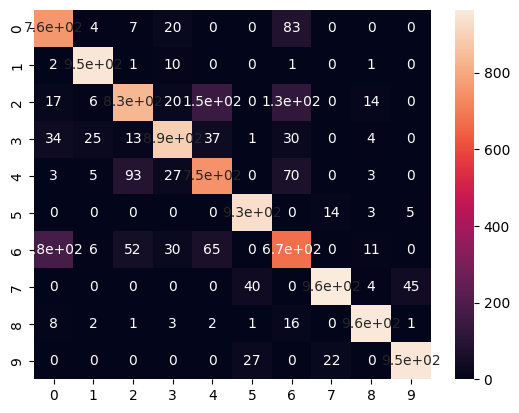

In [48]:
model22=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='tanh'),
    Dropout(0.3),
    Dense(256,activation='tanh'),
    Dropout(0.3),
    Dense(128,activation='tanh'),
    Dropout(0.3),
    Dense(10,activation='softmax')
    
])

model22.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.Huber(),metrics=['accuracy'])
early_stop2=EarlyStopping(monitor='loss',mode='min',patience=20)
print(model22.summary())

history22=model22.fit(xtrain2,y_trainc,epochs=100,batch_size=16,verbose=1,callbacks=[early_stop2],validation_split=0.1)

train_loss22,train_acc22=model22.evaluate(xtrain2,y_trainc)
print('Training Accuracy: %.4f' % train_acc21)
test_loss22,test_acc22=model22.evaluate(xtest2,y_testc)
print('Trest accuracy: %.4f'% test_acc22)

plt.plot(history22.history['accuracy'])
plt.title('MLP accuracy ')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history22.history['loss'])
plt.title('MLP loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper left")
plt.show()

ypred_prob=model22.predict(xtest2)
y_pred=np.argmax(ypred_prob,axis=1)
print('classification report: \n')
print(classification_report(y_pred,ytest))


cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True)

